In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df=pd.read_csv('waterNew.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,1
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.Potability.value_counts()

0    2808
1     468
Name: Potability, dtype: int64

In [6]:
df[df.Potability==1].describe()  ## checking the potable water class behaivoer 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.0
mean,7.332499,201.117700,15474.838578,7.078128,320.716300,398.069744,14.302031,67.242789,3.796566,1.0
std,0.523947,27.801625,3735.077554,1.576744,23.467466,60.039290,3.410413,16.223828,0.652726,0.0
min,6.504876,112.820254,320.942611,0.352000,211.851592,181.483754,5.051695,0.738000,1.917754,1.0
25%,7.036752,183.143717,12916.027410,6.069817,310.961129,358.667377,12.046005,56.799511,3.350805,1.0
50%,7.036752,200.802787,15992.663920,7.133600,333.073546,402.994705,14.345119,66.682582,3.825399,1.0
75%,7.787090,220.160789,18470.325872,8.093139,333.073546,446.503878,16.801886,77.986139,4.296273,1.0
max,8.479593,279.232419,20769.519640,12.279374,349.291954,499.070909,28.300000,124.000000,4.999752,1.0


In [7]:
df[df.Potability==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.0
mean,7.031143,195.578129,23103.968184,7.129635,335.757042,430.894338,14.282127,66.268260,3.995156,0.0
std,1.569288,33.590847,8892.034720,1.584300,37.419681,82.873273,3.291426,15.691672,0.796250,0.0
min,0.000000,47.432000,728.750830,0.530351,129.000000,201.619737,2.200000,8.175876,1.450000,0.0
25%,6.099274,175.334445,16558.298555,6.135761,318.356030,368.269515,12.069738,56.629028,3.453756,0.0
50%,7.036752,196.274345,22537.398385,7.130299,333.073546,426.041763,14.212209,66.622485,3.984780,0.0
75%,7.897372,215.951386,28463.703195,8.117840,355.915542,490.633655,16.520857,76.423373,4.546578,0.0
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,27.006707,120.030077,6.739000,0.0


([<matplotlib.axis.YTick at 0x2ac4cac7f70>,
 [Text(0, 0, ''), Text(0, 0, '')])

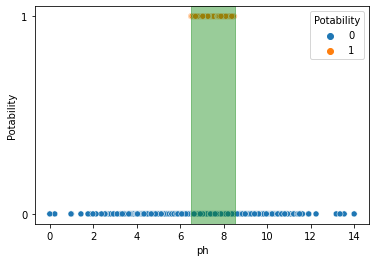

In [8]:
sns.scatterplot(data=df, x="ph",y='Potability',hue='Potability')
plt.axvspan(6.5, 8.5, color='green', alpha=0.4)
plt.yticks(np.arange(0, 1, 0.999999))


([<matplotlib.axis.YTick at 0x2ac4ca961c0>,
 [Text(0, 0, ''), Text(0, 0, '')])

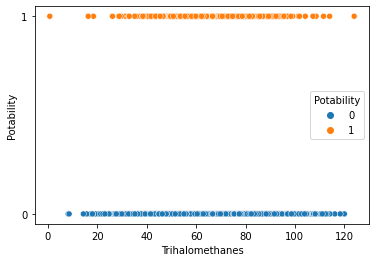

In [9]:
sns.scatterplot(data=df, x="Trihalomethanes",y='Potability',hue='Potability')
plt.yticks(np.arange(0, 1, 0.999999))

### Conclsinos
from the first  plot we can notice that pH valeus are from 6-8.5 but that alone doesnt give indication for potability we need more feature to make the descion , at the same time Trihalomethanes doesnt give indication for potability


In [10]:
#df.to_csv('waterNew.csv')

In [11]:
y_train=df.loc[0:2620,'Potability']
x_train=df.iloc[0:2621,0:9]
y_test=df.loc[2620:3276,'Potability']
x_test=df.iloc[2620:3276,0:9]

# KNN Model

In [12]:
### for loop to decide what is the best K for percion 
n=[]
per=[]
rec=[]
for i in range(1,50,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    per.append(precision_score(y_test, y_pred))
    rec.append(recall_score(y_test, y_pred))
    n.append(i)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

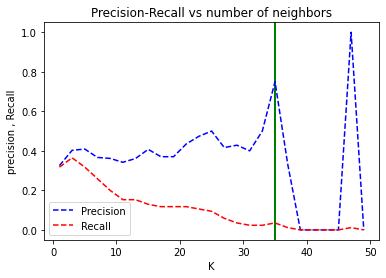

In [13]:
plt.plot(n,per, "b--", label="Precision")
plt.plot(n,rec, "r--", label="Recall")
plt.xlabel('K')
plt.ylabel('precision , Recall')
plt.title("Precision-Recall vs number of neighbors")
plt.axvspan(34.9, 35, color='green', alpha=1)
plt.legend(loc="lower left")

In [14]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


,0
accuracy,0.873476
recall,0.035294
precision,0.750000
roc_auc_score,0.516771


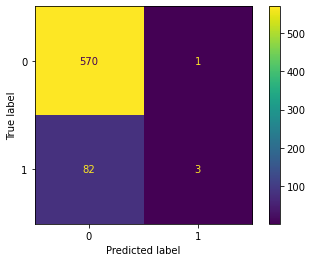

In [15]:
plot_confusion_matrix(knn, x_test, y_test)

### The model is strugling to find the potable water . but at least we are getting 0.75 perscion score and 1 miss classfied (FP)

# Logistic Regression Model

In [16]:
lm1 = LogisticRegression(C=500) 
lm1.fit(x_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=500)

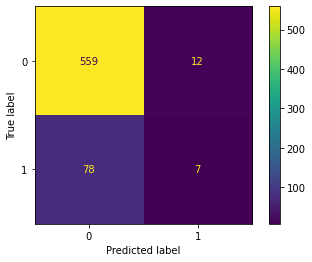

In [17]:
plot_confusion_matrix(lm1, x_test, y_test)

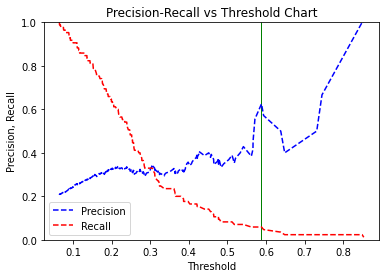

In [18]:


pred_y=lm1.predict(x_test) 

probs_y=lm1.predict_proba(x_test)



precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 

pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.axvspan(0.587, 0.588, color='green', alpha=1)

In [19]:
##from the grapgh above we can see that 0.588 has a spike for perscion while maitaing the same reacall so we are changing the threshold
THRESHOLD = 0.588275
preds = np.where(lm1.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.873476
recall,0.058824
precision,0.625000
roc_auc_score,0.526785


Text(33.0, 0.5, 'True')

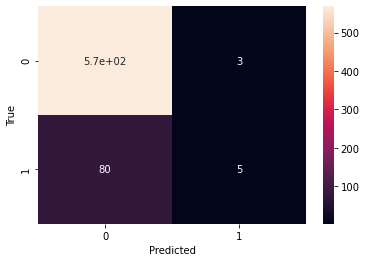

In [20]:
confusion_matrix(y_test, preds)
sns.heatmap(confusion_matrix(y_test, preds),annot=True,cmap='rocket')
plt.xlabel('Predicted')
plt.ylabel('True')

### Conclusions 
The model is predecting has the same accuracy compared with KNN with less perciscion even after tuning the threshold 

# Random Forest and Descion trees 

In [21]:
RC = RandomForestClassifier(n_estimators=100, max_features=3)
RC.fit(x_train, y_train)
y_predict = RC.predict(x_test)
pd.DataFrame(data=[accuracy_score(y_test, y_predict), recall_score(y_test, y_predict),
                   precision_score(y_test, y_predict), roc_auc_score(y_test, y_predict)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


,0
accuracy,0.996951
recall,0.976471
precision,1.000000
roc_auc_score,0.988235


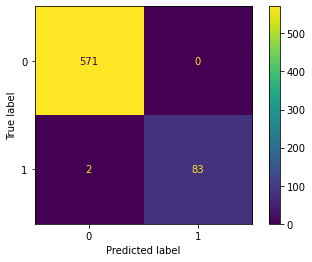

In [22]:
plot_confusion_matrix(RC, x_test, y_test)

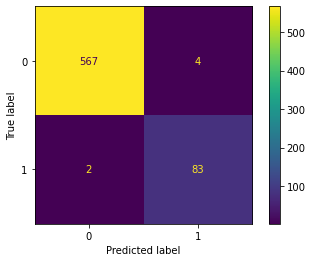

In [23]:
DTC=DecisionTreeClassifier(max_depth=5)
DTC.fit(x_train, y_train)
plot_confusion_matrix(DTC, x_test, y_test)


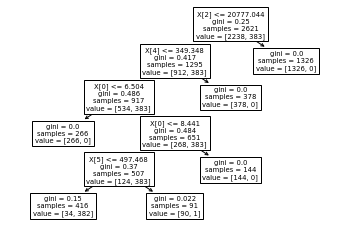

In [24]:
tree.plot_tree(DTC);

In [25]:
RC.feature_importances_

array([0.29583118, 0.01520812, 0.30457627, 0.01098977, 0.16674826,
       0.1215275 , 0.01131967, 0.01199067, 0.06180855])

In [26]:
df.columns[0:9]

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

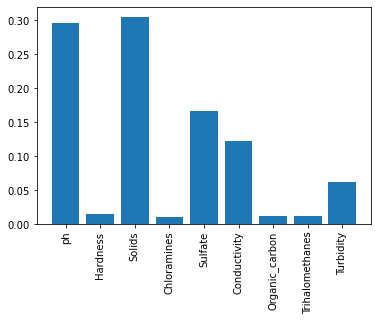

In [27]:
plt.bar(df.columns[0:9],RC.feature_importances_)
plt.xticks(rotation=90);